In [69]:
#Imports
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

In [70]:
'''Function to return last training accuracy and variance'''

def get_results(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    test_accuracy = float(lines[-4].split(' ')[-1].strip())
    variance = float(lines[-1].split(' ')[-1].strip())
    return test_accuracy, variance


In [71]:


table_data = [
    ['Methods', 'clean', '20%(A1)', '50%(A1)', '80%(A1)', '20%(A2)', '50%(A2)', '80%(A2)', '10%(A3)', '20%(A3)', '50%(A3)']
]

methods = ['global', 'local', 'ditto']
for method in methods:
    row = [method]
    filename = 'Ques1/results/' + method + '_femnist_1_0.txt'
    accuracy, variance = get_results(filename)
    row.append('{:.2f}({:.2f})'.format(accuracy, variance))
    for adversary in range(1, 4):
        for percent in [0.2, 0.5, 0.8]:
            filename = 'Ques1/results/' + method + '_femnist_' + str(adversary) + '_' + str(percent) + '.txt'
            accuracy, variance = get_results(filename)
            row.append('{:.2f}({:.2f})'.format(accuracy, variance))
    table_data.append(row)

table_name = 'Table 1 for FEMNIST'
pd_dataframe = pd.DataFrame(table_data[1:], columns=table_data[0])
table_output = tabulate(pd_dataframe, headers='keys', tablefmt='psql')

print(f"{'=' * 10} {table_name} {'=' * 10}\n")
print(table_output)


========== Table 1 for FEMNIST ==========

+----+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|    | Methods   | clean      | 20%(A1)    | 50%(A1)    | 80%(A1)    | 20%(A2)    | 50%(A2)    | 80%(A2)    | 10%(A3)    | 20%(A3)    | 50%(A3)    |
|----+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------|
|  0 | global    | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) |
|  1 | local     | 0.11(0.01) | 0.09(0.01) | 0.06(0.01) | 0.03(0.01) | 0.09(0.01) | 0.06(0.00) | 0.03(0.00) | 0.09(0.01) | 0.06(0.01) | 0.03(0.00) |
|  2 | ditto     | 0.74(0.02) | 0.64(0.02) | 0.52(0.02) | 0.08(0.00) | 0.62(0.02) | 0.45(0.02) | 0.28(0.02) | 0.16(0.01) | 0.10(0.01) | 0.06(0.00) |
+----+-----------+------------+------------+------------+------

In [72]:
''' 1). Table 1 for fmnist dataset'''
table_data = [
    ['Methods', 'clean', '20%(A1)', '50%(A1)', '80%(A1)', '20%(A2)', '50%(A2)', '80%(A2)', '10%(A3)', '20%(A3)', '50%(A3)']
]

methods = ['global', 'local', 'ditto']
for method in methods:
    row = [method]
    filename = 'Ques1/results/' + method + '_fmnist_1_0.txt'
    accuracy, variance = get_results(filename)
    row.append('{:.2f}({:.2f})'.format(accuracy, variance))
    for adversary in range(1, 4):
        for percent in [0.2, 0.5, 0.8]:
            filename = 'Ques1/results/' + method + '_fmnist_' + str(adversary) + '_' + str(percent) + '.txt'
            accuracy, variance = get_results(filename)
            row.append('{:.2f}({:.2f})'.format(accuracy, variance))
    table_data.append(row)
table_name = 'Table 1 for FMNIST'
pd_dataframe = pd.DataFrame(table_data[1:], columns=table_data[0])
table_output = tabulate(pd_dataframe, headers='keys', tablefmt='psql')

print(f"{'=' * 10} {table_name} {'=' * 10}\n")
print(table_output)

========== Table 1 for FMNIST ==========

+----+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|    | Methods   | clean      | 20%(A1)    | 50%(A1)    | 80%(A1)    | 20%(A2)    | 50%(A2)    | 80%(A2)    | 10%(A3)    | 20%(A3)    | 50%(A3)    |
|----+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------|
|  0 | global    | 0.11(0.02) | 0.11(0.02) | 0.11(0.03) | 0.11(0.03) | 0.11(0.02) | 0.11(0.03) | 0.11(0.03) | 0.11(0.02) | 0.11(0.03) | 0.11(0.03) |
|  1 | local     | 0.85(0.02) | 0.70(0.02) | 0.48(0.02) | 0.27(0.02) | 0.70(0.02) | 0.48(0.02) | 0.27(0.02) | 0.70(0.02) | 0.48(0.02) | 0.27(0.02) |
|  2 | ditto     | 0.94(0.01) | 0.83(0.01) | 0.64(0.01) | 0.41(0.01) | 0.81(0.01) | 0.63(0.01) | 0.43(0.01) | 0.81(0.01) | 0.66(0.01) | 0.33(0.01) |
+----+-----------+------------+------------+------------+-------

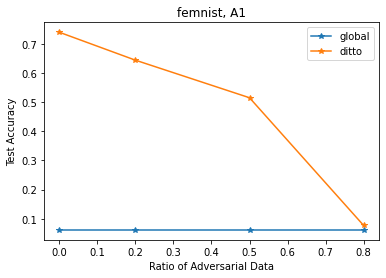

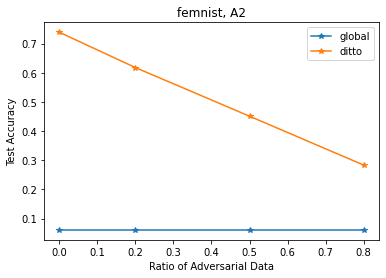

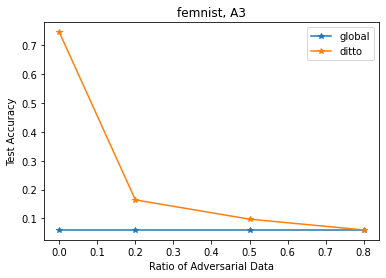

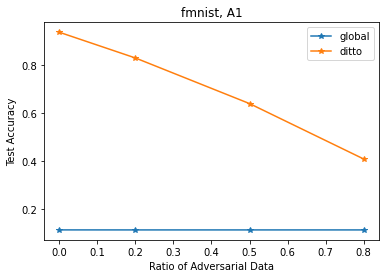

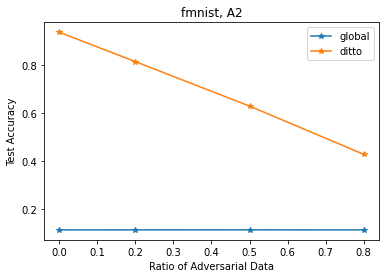

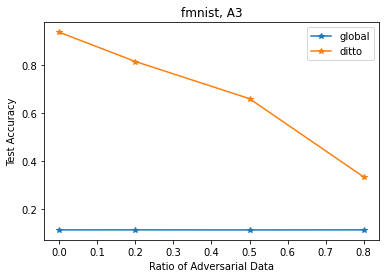

In [73]:
'''1) Figure 3'''
def plot_accuracy_vs_ratio(dataset_name, adversary):
    x = [0, 0.2, 0.5, 0.8]
    methods = ['global', 'ditto']
    for method in methods:
        y = []
        for percent in x:
            filename = 'Ques1/results/' + method + '_' + dataset_name + '_' + str(adversary) + '_' + str(percent) + '.txt'
            accuracy, variance = get_results(filename)
            y.append(accuracy)
        plt.plot(x, y, label=method, marker='*')
        
for dataset in ['femnist', 'fmnist']:
    for adversary in range(1,4):
        plot_accuracy_vs_ratio(dataset, adversary)
        plt.xlabel('Ratio of Adversarial Data')
        plt.ylabel('Test Accuracy')
        plt.legend()
        plt.title(dataset + ', A' + str(adversary))
        plt.show()
        